# Import Data

Data is imported and data structure observed

In [11]:
# Read in dataset
import pandas as pd
apps_with_duplicates = pd.read_csv("datasets/apps.csv")

# Drop duplicates from apps_with_duplicates
apps = apps_with_duplicates.drop_duplicates(subset=['App'])
type(apps)

# Print the total number of apps
print("Total number of apps in the dataset = ", apps.size)

# Have a look at a random sample of 5 rows
apps.sample(5)

Total number of apps in the dataset =  135226


,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
7937,9056,Santa's Monster Shootout DX,GAME,5.0,4,33.0,50+,Paid,$1.99,Teen,Action,"August 15, 2013",1.05,2.2 and up
2037,2579,Quora,SOCIAL,4.5,313633,NaN,"10,000,000+",Free,0,Teen,Social,"July 25, 2018",Varies with device,Varies with device
6270,7315,Betting Tips / Sports Tips by CG Tipster,SPORTS,4.1,315,7.7,"10,000+",Free,0,Everyone,Sports,"July 18, 2018",6.95,4.4 and up
820,1031,Picktrainer: India's largest photo contest app,EVENTS,4.5,1065,9.0,"100,000+",Free,0,Everyone,Events,"May 31, 2018",1.3.2,4.1 and up
9341,10516,Fast Notes FJ,PRODUCTIVITY,4.2,12,2.2,500+,Free,0,Everyone,Productivity,"August 12, 2014",8.0.0,2.2 and up


# Data Cleaning

Unwanted characters are removed from the Installs and Price columns the data is then converted from strings to numeric data to enable further analysis.

In [12]:
# List of characters to remove
chars_to_remove = ["+",",","$"]

# List of column names to clean
cols_to_clean = ["Installs","Price"]

# Loop for each column in cols_to_clean
for col in cols_to_clean:
    # Loop for each char in chars_to_remove
    for char in chars_to_remove:
        # Replace the character with an empty string
        apps[col] = apps[col].apply(lambda x: x.replace(char, ''))
        
# Print a summary of the apps dataframe
apps.head()

import numpy as np

cols = ["Installs","Price"]

# Convert Installs and Price to float data type
apps[cols] = apps[cols].astype("float64")

# Checking dtypes of the apps dataframe
print(apps[cols].dtypes)

Installs    float64
Price       float64
dtype: object


# Exploring App Categories

Apps are analysed according to the categories they belong to. The most prevlant apps are found in Family, Games and Tools. With family apps found to dominate the market.

In [13]:
import plotly
plotly.offline.init_notebook_mode(connected=True)
import plotly.graph_objs as go

# Print the total number of unique categories
num_categories = apps["Category"].unique()
print('Number of categories = ', len(num_categories))

# Count the number of apps in each 'Category'. 
num_apps_in_category = apps["Category"].value_counts()

# Sort num_apps_in_category in descending order based on the count of apps in each category
sorted_num_apps_in_category = num_apps_in_category.sort_values(ascending = False)

data = [go.Bar(
        x = num_apps_in_category.index, # index = category name
        y = num_apps_in_category.values, # value = count
)]

plotly.offline.iplot(data)

Number of categories =  33


# Distribution of Ratings

Apps are then analysed based on their user ratings. Unsurprinsgly ratings have a heavily scewed didtribution with a mean rating of 4.17

In [14]:
# Average rating of apps
avg_app_rating = apps["Rating"].mean()
print('Average app rating = ', avg_app_rating)

# Distribution of apps according to their ratings
data = [go.Histogram(
        x = apps['Rating'],
)]

# Vertical dashed line to indicate the average app rating
layout = {'shapes': [{
              'type' :'line',
              'x0': avg_app_rating,
              'y0': 0,
              'x1': avg_app_rating,
              'y1': 1000,
              'line': { 'dash': 'dashdot'}
          }]
          }

plotly.offline.iplot({'data': data, 'layout': layout})

Average app rating =  4.173243045387998


# How Does Sizes and Price Affect an Apps Rating?

Inutution suggests that application which occupy large amounts of disk space or are expensive will negatively affect user uptake. Here we aim to assess whether these factors also affect an applications rating. We find that the vast majority of apps are less than 40MB and are priced at less than 10$.

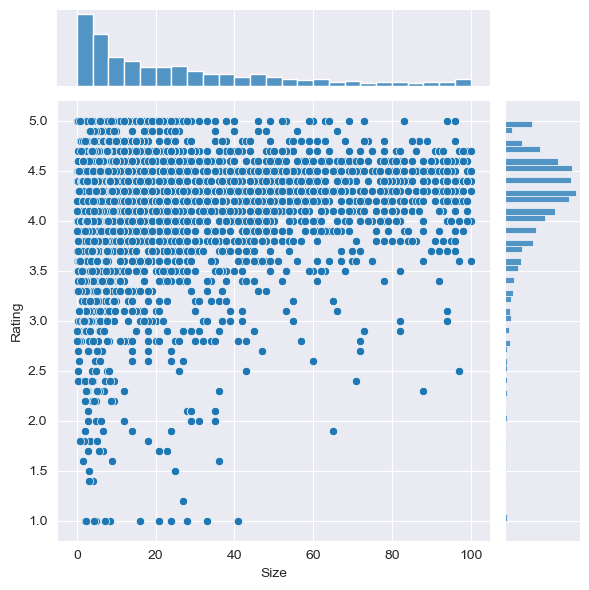

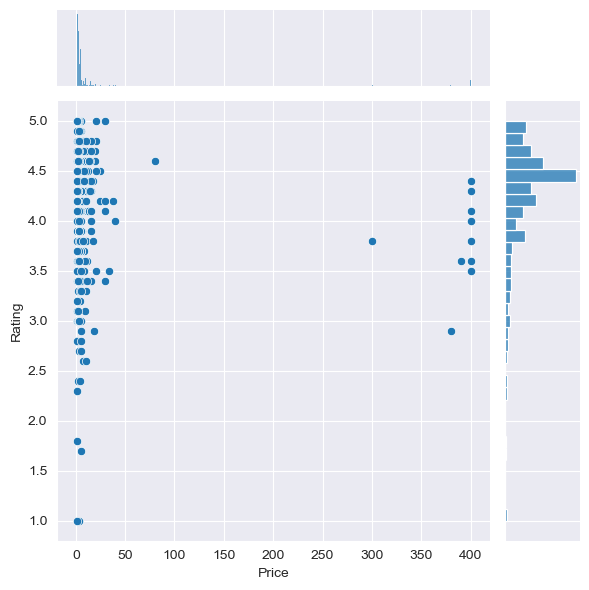

In [15]:
%matplotlib inline
import seaborn as sns
sns.set_style("darkgrid")
import warnings
warnings.filterwarnings("ignore")

# Select rows where both 'Rating' and 'Size' values are present (ie. the two values are not null) 
apps_with_size_and_rating_present = apps.dropna(subset = ["Rating","Size"])

# Subset for categories with at least 250 apps
large_categories = apps_with_size_and_rating_present.groupby("Category").filter(lambda x: len(x) >= 250)

# Plot size vs. rating
plt1 = sns.jointplot(x = large_categories["Size"], y = large_categories["Rating"])

# Select apps whose 'Type' is 'Paid'
paid_apps = apps_with_size_and_rating_present[apps_with_size_and_rating_present["Price"] != 0]

# Plot price vs. rating
plt2 = sns.jointplot(x = paid_apps["Price"], y = paid_apps["Rating"])

# Relation between app category and app price

We next conduct some analysis on how the price point for applications in different categories. While games may rely on in app advertisements/purchases to generate income. Medical applications tend to have a higher upfront price point.

,Category,App,Price
3327,FAMILY,most expensive app (H),399.99
3465,LIFESTYLE,💎 I'm rich,399.99
3469,LIFESTYLE,I'm Rich - Trump Edition,400.00
4396,LIFESTYLE,I am rich,399.99
4398,FAMILY,I am Rich Plus,399.99
4399,LIFESTYLE,I am rich VIP,299.99
4400,FINANCE,I Am Rich Premium,399.99
4401,LIFESTYLE,I am extremely Rich,379.99
4402,FINANCE,I am Rich!,399.99
4403,FINANCE,I am rich(premium),399.99


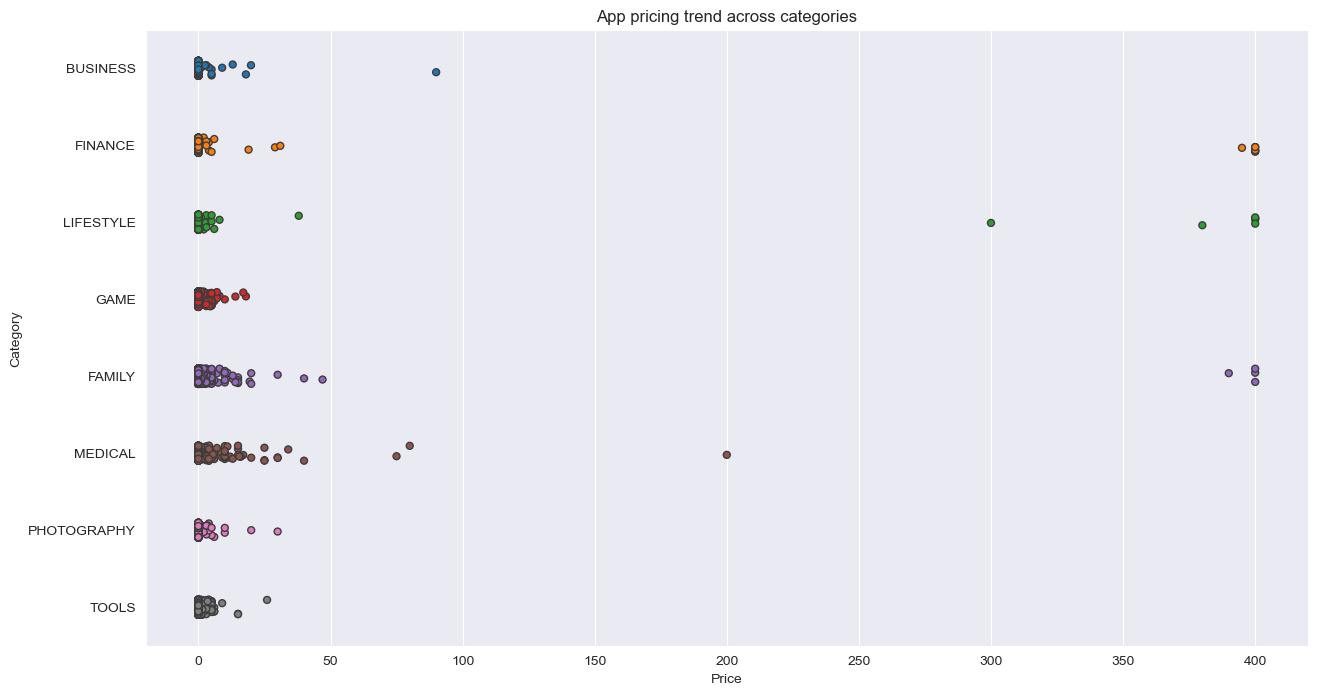

In [16]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

# Select a few popular app categories
popular_app_cats = apps[apps["Category"].isin(['GAME', 'FAMILY', 'PHOTOGRAPHY',
                                            'MEDICAL', 'TOOLS', 'FINANCE',
                                            'LIFESTYLE','BUSINESS'])]

# Examine the price trend by plotting Price vs. Category
ax = sns.stripplot(x = popular_app_cats['Price'], y = popular_app_cats['Category'], jitter=True, linewidth=1)
ax.set_title('App pricing trend across categories')

# Apps whose Price is greater than 200
apps_above_200 = apps[apps['Price'] > 200]
apps_above_200[['Category', 'App', 'Price']]

# Filtering Data

The plots above show some outlier applications which are 'junk' applications and not really intended to be purchased by users. These are removed and the data is replotted.

Text(0.5, 1.0, 'App pricing trend across categories after filtering for junk apps')

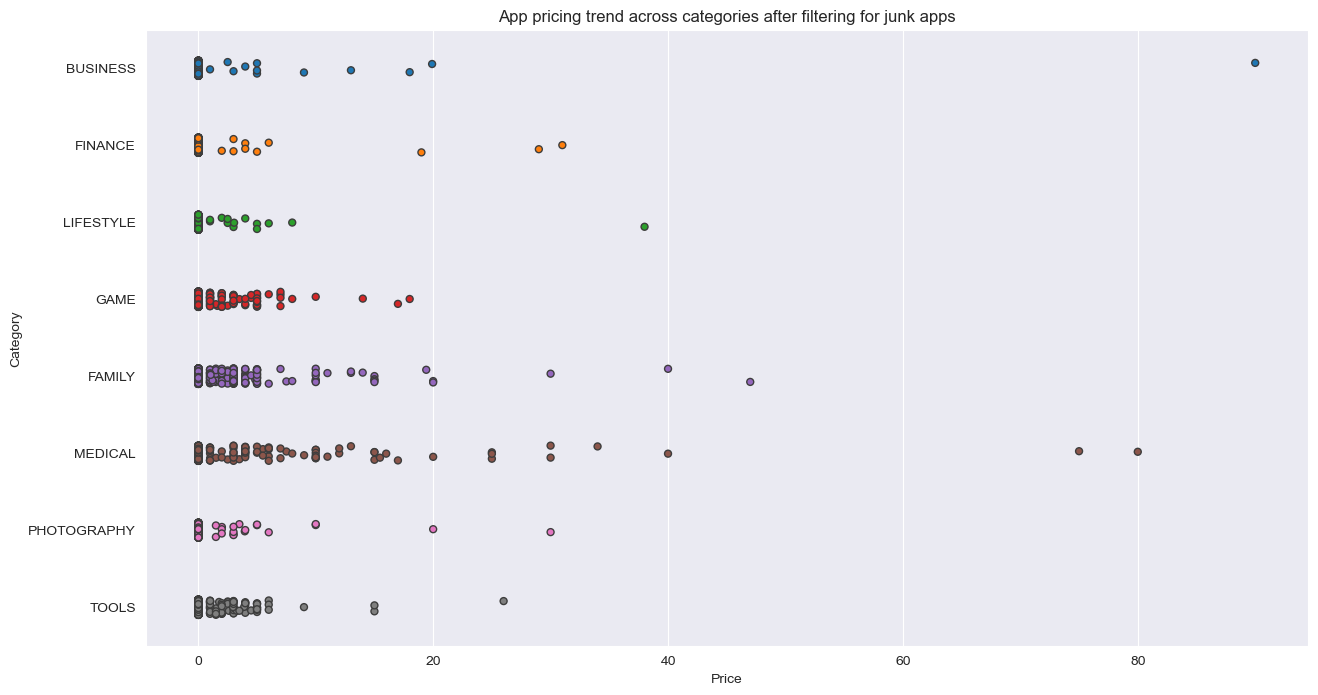

In [17]:
# Select apps priced below $100
apps_under_100 = popular_app_cats[popular_app_cats["Price"] < 100]

fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

# Examine price vs category with the authentic apps (apps_under_100)
ax = sns.stripplot(x = apps_under_100["Price"], y = apps_under_100["Category"], jitter = True, linewidth = 1)
ax.set_title('App pricing trend across categories after filtering for junk apps')

# Popularity of Paid Apps vs Free Apps

Here we have considered the popularity of upfront paid applications compared against free applications. Generating some simple boxplots 
shows that free applications get many more installations than paid applications. This is not surprising, however the boxplots indicate that paid applications can still generate a considerable number of installations. 

In [19]:
trace0 = go.Box(
    # Data for paid apps
    y = apps[apps['Type'] == "Paid"]['Installs'],
    name = 'Paid'
)

trace1 = go.Box(
    # Data for free apps
    y = apps[apps['Type'] == "Free"]['Installs'],
    name = 'Free'
)

layout = go.Layout(
    title = "Number of downloads of paid apps vs. free apps",
    yaxis = dict(title = "Log number of downloads",
                type = 'log',
                autorange = True)
)

# Add trace0 and trace1 to a list for plotting
data = [trace0, trace1]
plotly.offline.iplot({'data': data, 'layout': layout})

# Sentiment analysis of user reviews

Here we have merged application data and user review senitment. Generating boxplots of the data shows that paid applications have more poistive user feedback than free applications, indictaing a higher quality of application.

Text(0.5, 1.0, 'Sentiment Polarity Distribution')

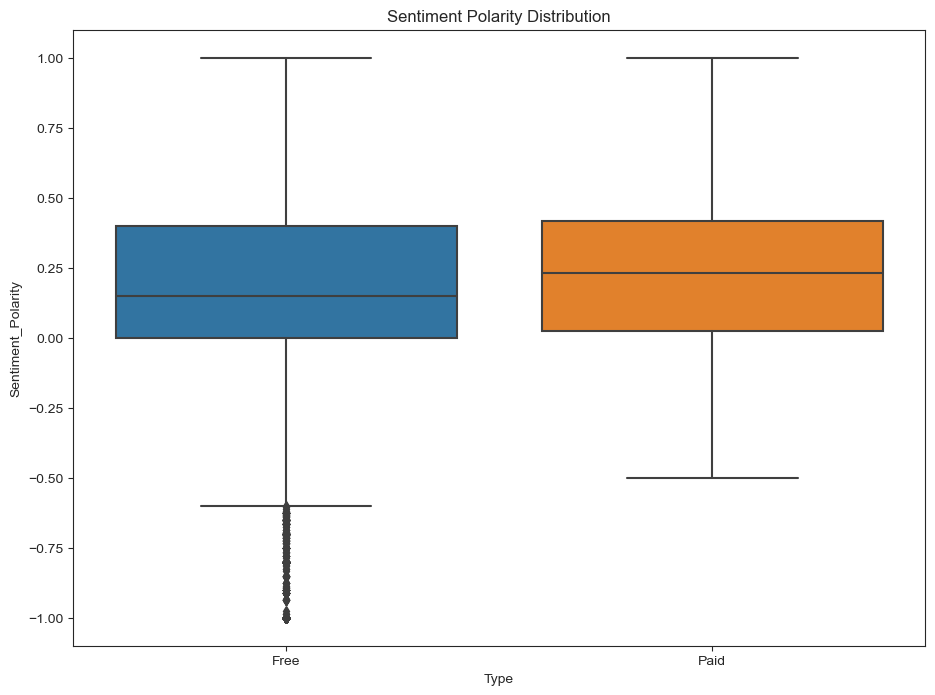

In [9]:
# Load user_reviews.csv
reviews_df = pd.read_csv('datasets/user_reviews.csv')

# Join the two dataframes
merged_df = apps.merge(reviews_df)

# Drop NA values from Sentiment and Review columns
merged_df = merged_df.dropna(subset = ['Sentiment', 'Review'])

sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11, 8)

# User review sentiment polarity for paid vs. free apps
ax = sns.boxplot(x = 'Type', y = 'Sentiment_Polarity', data = merged_df)
ax.set_title('Sentiment Polarity Distribution')